## Demo of using AdditiveOUNoise

In [1]:
from noisy_load_profiles import perturbations, Pipeline
import numpy as np
import matplotlib.pyplot as plt

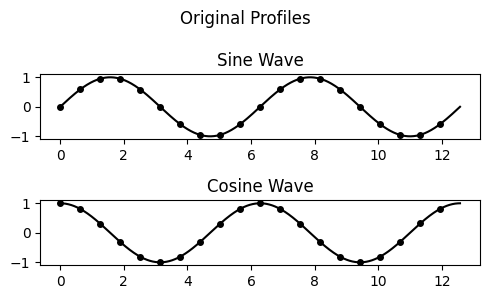

In [2]:
# build original load profiles, a sine and a cosine wave
timesteps = 1000
t = np.linspace(0, 4 * np.pi, timesteps)
original_profiles = np.array([np.sin(t), np.cos(t)])
original_profiles = original_profiles.T # shape (timesteps, 2)


# plot original profiles
fig, axs = plt.subplots(2, 1, figsize=(5, 3))

axs[0].plot(t, original_profiles[:, 0], label='Original Sine Wave', color="black", marker='o', markersize=4, markevery=50)
axs[0].set_title('Sine Wave')

axs[1].plot(t, original_profiles[:, 1], label='Original Cosine Wave', color='black',  marker='o', markersize=4, markevery=50)
axs[1].set_title('Cosine Wave')

fig.suptitle('Original Profiles')
fig.tight_layout()

In [3]:
help(perturbations.OUNoise)

Help on class OUNoise in module noisy_load_profiles.perturbations.random:

class OUNoise(noisy_load_profiles.base.Perturbation)
 |  OUNoise(theta: float = 0.5, mu: float = 0.0, sigma: float = 0.05, dt: float = 1.0, method: str = 'additive', per_column_independent: bool = True, eps_scale: float = 1e-12, seed: Optional[int] = None, transformation: Optional[Dict[str, Any]] = None, track_input_profiles: bool = False)
 |
 |  Applies Ornstein–Uhlenbeck (OU) noise to each column.
 |  Put simply, OU noise is like a random walk that has a tendency to revert to a mean value (mu) over time.
 |
 |  Noise can be applied additively or multiplicatively to the profiles.
 |  Additive: perturbed_profile = profile + noise
 |  Multiplicative: perturbed_profile = profile * (1 + noise)
 |
 |  Discrete update (Euler–Maruyama):
 |      x[t+1] = x[t] + theta * (mu - x[t]) * dt + sigma_eff[c] * sqrt(dt) * N(0,1)
 |
 |  Simplified scaling:
 |      sigma_eff[c] = sigma * mean(abs(profiles[:, c]))
 |  where `sigma

In [4]:
# initialize a perturbation
perturbation = perturbations.OUNoise(theta=0.03, sigma=0.2, seed=42)

# add a perturbation to a pipeline
pipeline = Pipeline([perturbation])

# apply the perturbation to the profiles
perturbed_profiles = pipeline.apply(original_profiles)


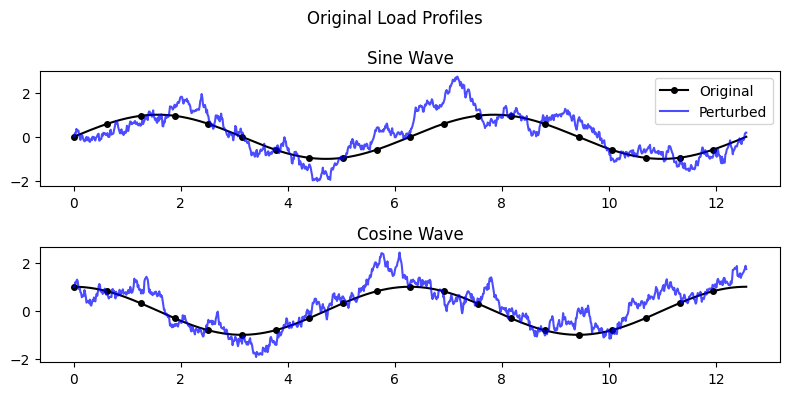

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].plot(t, original_profiles[:, 0], label='Original', color="black", marker='o', markersize=4, markevery=50)
axs[0].plot(t, perturbed_profiles[:, 0], label='Perturbed', color='blue', alpha=0.7)
axs[0].set_title('Sine Wave')
axs[0].legend()

axs[1].plot(t, original_profiles[:, 1], label='Original', color='black',  marker='o', markersize=4, markevery=50)
axs[1].plot(t, perturbed_profiles[:, 1], label='Perturbed', color='blue' , alpha=0.7)
axs[1].set_title('Cosine Wave')


fig.suptitle('Original Load Profiles')
fig.tight_layout()